In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Loading the data set
df = pd.read_csv('/home/western/Documents/data/electricity_bill_dataset.csv')
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8           3806.4  
2         7.7           3203.2  
3         9.2           4370.0  
4         9.2           4204.4

In [3]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [5]:
# Data preparation
## Data Cleaning
# Checking missing values
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [6]:
# Checking duplicates
df.duplicated().sum()

0

In [7]:
# Converting electricitybill data type to float for uniformity
df['ElectricityBill'] = df['ElectricityBill'].astype(float)
df['ElectricityBill']

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [8]:
# Feature Engineering
# Method to categorize seasons
def categorize_seasons(Month):
    if Month in [3, 4, 5]:
        return "Summer"
    elif Month in [6, 7, 8, 9]:
        return  "Monsoon"
    else:
        return  "Winter"

    
df['season'] = df['Month'].apply(categorize_seasons)

df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  
0         8.4           3225.6   Winter  
1         7.8           3806.4   Summer  
2         7.7           3203.2  Monsoon  
3         9.2           4370.0  Monsoon  
4         9.2           4204.4   Winter

In [9]:
# MonthlyCostPerHour
df['MonthlyCostPerHour'] = df['ElectricityBill'] / df['MonthlyHours']
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  
0         8.4           3225.6   Winter                 8.4  
1         7.8           3806.4   Summer                 7.8  
2         7.7           3203.2  Monsoon                 7.7  
3         9.2           4370.0  Monsoon                 9.2  
4         9.2           4204.4   Winter                 9.2

In [10]:
df.describe()

Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.000000     22.000000     12.000000   

       MotorPump         Month  MonthlyHours    TariffRate  ElectricityBill  \
count    45345.0  45345.000000  45345.000000  45345.000000     45345.000000   
mean         0.0      6.488058    515.083207      8.369648      4311.771307   
std          0.0      3.443252    122.618017      0.576992      1073.886406   
min          0.0      1.000000     95.000000      7.400000       807.500000   
25%          0.0      3.000000    429.000000      7.900000      3556.800000   
50%          0.0      6.000000    515.000000      8.400000      4299.400000   
75%          0.0      9.000000    601.000000      8.900000      5038.800000   
max          0.0     12.000000    926.000000      9.300000      8286.300000   

       MonthlyCostPerHour  
count        45345.000000  
mean             8.369648  
std              0.576992  
min              7.400000  
25%              7.900000  
50%              8.400000  
75%              8.900000  
max              9.300000

In [68]:
# Tariff Efficiency
df['TariffEfficiency'] = df['ElectricityBill'] / df['TariffRate']
df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  
0         8.4           3225.6   Winter                 8.4             384.0  
1         7.8           3806.4   Summer                 7.8             488.0  
2         7.7           3203.2  Monsoon                 7.7             416.0  
3         9.2           4370.0  Monsoon                 9.2             475.0  
4         9.2           4204.4   Winter                 9.2             457.0

In [69]:
# Total Appliance Usage
df['TotalApplianceHours'] = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].sum(axis=1)
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill   season  MonthlyCostPerHour  TariffEfficiency  \
0         8.4           3225.6   Winter                 8.4             384.0   
1         7.8           3806.4   Summer                 7.8             488.0   
2         7.7           3203.2  Monsoon                 7.7             416.0   
3         9.2           4370.0  Monsoon                 9.2             475.0   
4         9.2           4204.4   Winter                 9.2             457.0   

   TotalApplianceHours  
0                 48.0  
1                 47.0  
2                 42.0  
3                 54.0  
4                 48.0

In [70]:
# Percentage Contribution of Each Appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
for appliance in appliances:
    df[f'{appliance}_Contribution'] = (df[appliance] / df['TotalApplianceHours']) * 100
df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  ...  \
0  Hyderabad                    Tata Power Company Ltd.           384  ...   
1   Vadodara                                       NHPC           488  ...   
2     Shimla                            Jyoti Structure           416  ...   
3     Mumbai                            Power Grid Corp           475  ...   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457  ...   

    season  MonthlyCostPerHour TariffEfficiency  TotalApplianceHours  \
0   Winter                 8.4            384.0                 48.0   
1   Summer                 7.8            488.0                 47.0   
2  Monsoon                 7.7            416.0                 42.0   
3  Monsoon                 9.2            475.0                 54.0   
4   Winter                 9.2            457.0                 48.0   

   Fan_Contribution  Refrigerator_Contribution  AirConditioner_Contribution  \
0         33.333333                  47.916667                     4.166667   
1         40.425532                  46.808511                     4.255319   
2         16.666667                  47.619048                     4.761905   
3         12.962963                  40.740741                     5.555556   
4         22.916667                  47.916667                     4.166667   

   Television_Contribution  Monitor_Contribution  MotorPump_Contribution  
0                12.500000              2.083333                     0.0  
1                 6.382979              2.127660                     0.0  
2                14.285714             16.666667                     0.0  
3                38.888889              1.851852                     0.0  
4                22.916667              2.083333                     0.0  

[5 rows x 22 columns]

In [71]:
# Usage Category
def categorize_usage(bill):
    if bill < 2500:
        return 'Low'
    elif  2501 <= bill <= 5000 :
        return 'Medium'
    else:
        return 'High'

df['UsageCategory'] = df['ElectricityBill'].apply(categorize_usage)
df.head(15)

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0    16          23.0             2.0         6.0      1.0          0     10   
1    19          22.0             2.0         3.0      1.0          0      5   
2     7          20.0             2.0         6.0      7.0          0      7   
3     7          22.0             3.0        21.0      1.0          0      6   
4    11          23.0             2.0        11.0      1.0          0      2   
5    13          22.0             0.0        18.0      1.0          0      6   
6    23          22.0             3.0        20.0     12.0          0      5   
7    22          23.0             0.0        21.0      1.0          0     12   
8     8          20.0             2.0         8.0      1.0          0      8   
9    10          23.0             0.0        18.0      7.0          0      1   
10   16          22.0             3.0        14.0      1.0          0      6   
11    5          19.0             2.0        20.0      1.0          0     12   
12   10          23.0             1.0        22.0      1.0          0      9   
13   11          22.0             3.0        19.0      1.0          0     11   
14   18          22.0             1.0         3.0     12.0          0      7   

         City                                    Company  MonthlyHours  ...  \
0   Hyderabad                    Tata Power Company Ltd.           384  ...   
1    Vadodara                                       NHPC           488  ...   
2      Shimla                            Jyoti Structure           416  ...   
3      Mumbai                            Power Grid Corp           475  ...   
4      Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457  ...   
5   Ratnagiri                           Adani Power Ltd.           471  ...   
6   New Delhi                            Kalpataru Power           755  ...   
7   New Delhi                           Adani Power Ltd.           492  ...   
8   New Delhi                               Orient Green           546  ...   
9       Dahej            Sterlite Power Transmission Ltd           578  ...   
10  Ahmedabad         Neueon Towers / Sujana Towers Ltd.           450  ...   
11     Mumbai            Sterlite Power Transmission Ltd           493  ...   
12  Hyderabad                          KEC International           492  ...   
13  Ahmedabad                            Indowind Energy           565  ...   
14      Noida            Unitech Power Transmission Ltd.           414  ...   

    MonthlyCostPerHour  TariffEfficiency TotalApplianceHours  \
0                  8.4             384.0                48.0   
1                  7.8             488.0                47.0   
2                  7.7             416.0                42.0   
3                  9.2             475.0                54.0   
4                  9.2             457.0                48.0   
5                  7.4             471.0                54.0   
6                  8.5             755.0                80.0   
7                  8.5             492.0                67.0   
8                  8.5             546.0                39.0   
9                  7.6             578.0                58.0   
10                 7.9             450.0                56.0   
11                 9.2             493.0                47.0   
12                 8.4             492.0                57.0   
13                 7.9             565.0                56.0   
14                 8.2             414.0                56.0   

    Fan_Contribution  Refrigerator_Contribution  AirConditioner_Contribution  \
0          33.333333                  47.916667                     4.166667   
1          40.425532                  46.808511                     4.255319   
2          16.666667                  47.619048                     4.761905   
3          12.962963                  40.740741                     5.555556   
4          22.916667             

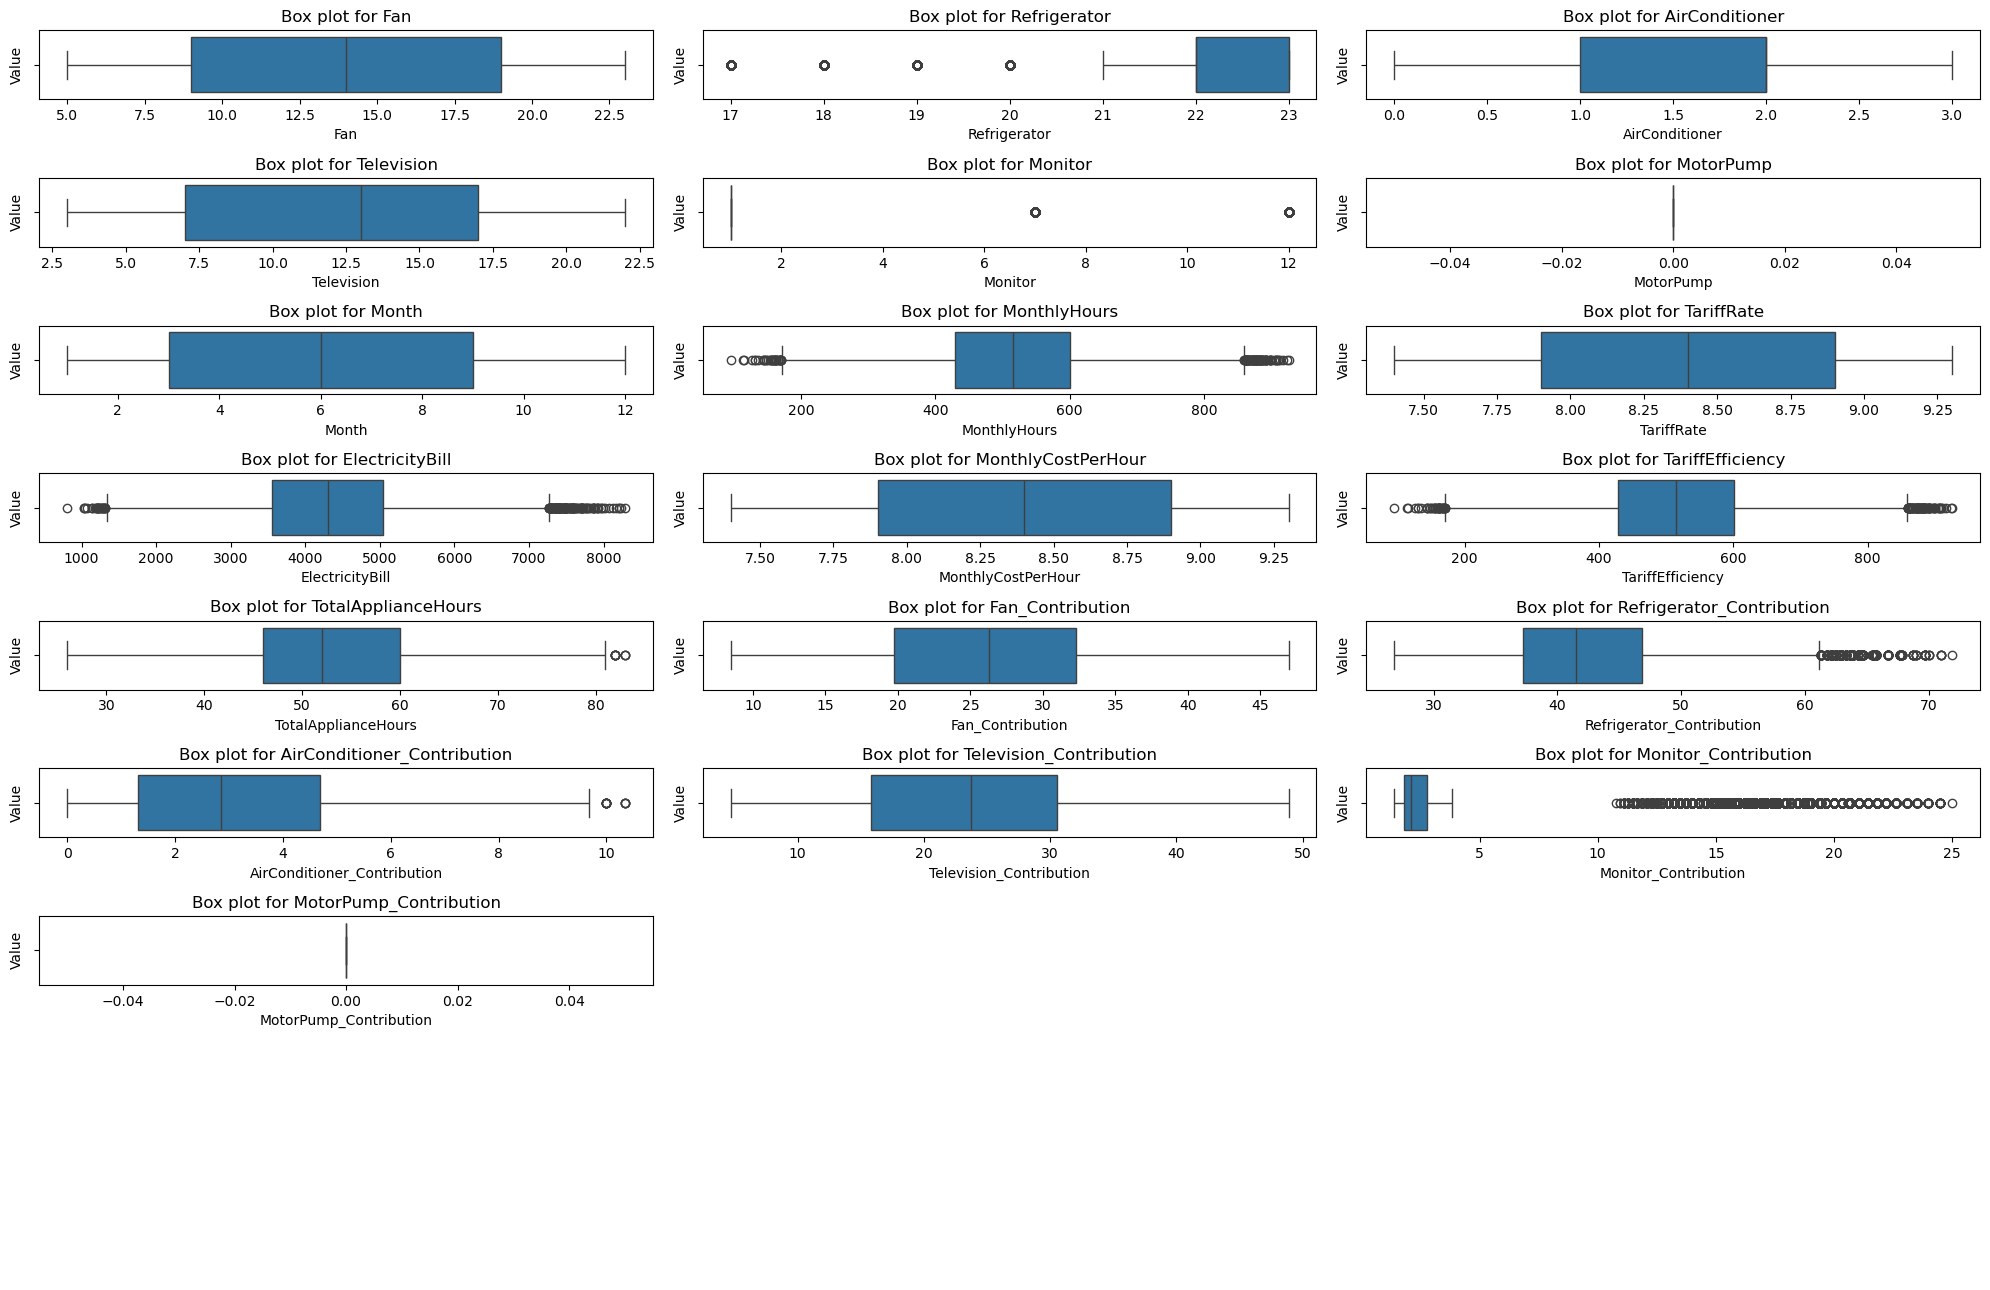

In [72]:
# Checking for outliers
#Only select numeric columns 
numeric_columns = df.select_dtypes(include=['float','integer']).columns[:]

# Grid layout
rows, cols = 9, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [73]:
# Dropping outliers
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['float','integer'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.20)  # .20
q3 = numeric_data.quantile(0.80)  # .80
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 45345
Number of rows after removing outliers: 34654
Number of rows removed: 10691



Average Consumption per Appliance (kWh):
        Appliance  Average Consumption (kWh)
1    Refrigerator                  21.928205
0             Fan                  14.305188
3      Television                  12.525105
2  AirConditioner                   1.513909
4         Monitor                   1.000000
5       MotorPump                   0.000000


/tmp/ipykernel_56674/860222075.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




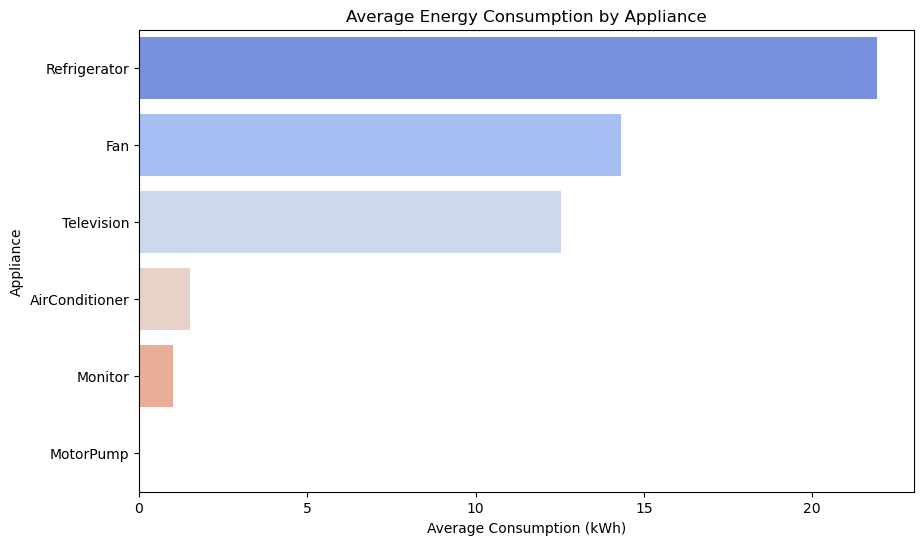

In [74]:

# --------- Objective 1: Appliance-Specific Energy Consumption ---------

# Calculate total consumption for each appliance
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
appliance_consumption = df[appliances].mean().reset_index()
appliance_consumption.columns = ['Appliance', 'Average Consumption (kWh)']

# Sort appliances by average consumption
appliance_consumption = appliance_consumption.sort_values('Average Consumption (kWh)', ascending=False)
print("\nAverage Consumption per Appliance (kWh):")
print(appliance_consumption)

# Plot appliance-specific consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_consumption, x='Average Consumption (kWh)', y='Appliance', palette='coolwarm')
plt.title('Average Energy Consumption by Appliance')
plt.xlabel('Average Consumption (kWh)')
plt.ylabel('Appliance')
plt.show()




Monthly Electricity Usage Trends:
    Month  ElectricityBill        Fan  Refrigerator  AirConditioner
0       1      4308.876709  14.338424     21.919125        1.502950
1       2      3831.561739  14.245913     21.922783        1.517913
2       3      4333.636459  14.344546     21.917431        1.529392
3       4      4177.856891  14.369806     21.964681        1.515928
4       5      4290.081589  14.377794     21.914154        1.473217
5       6      4135.277266  14.295330     21.954327        1.508929
6       7      4349.890323  14.440042     21.960028        1.505259
7       8      4310.891125  14.181911     21.937669        1.534553
8       9      4146.695658  14.102303     21.895066        1.524342
9      10      4320.486474  14.296188     21.903959        1.524560
10     11      4156.563990  14.275709     21.916297        1.517595
11     12      4325.006415  14.412055     21.933380        1.510398


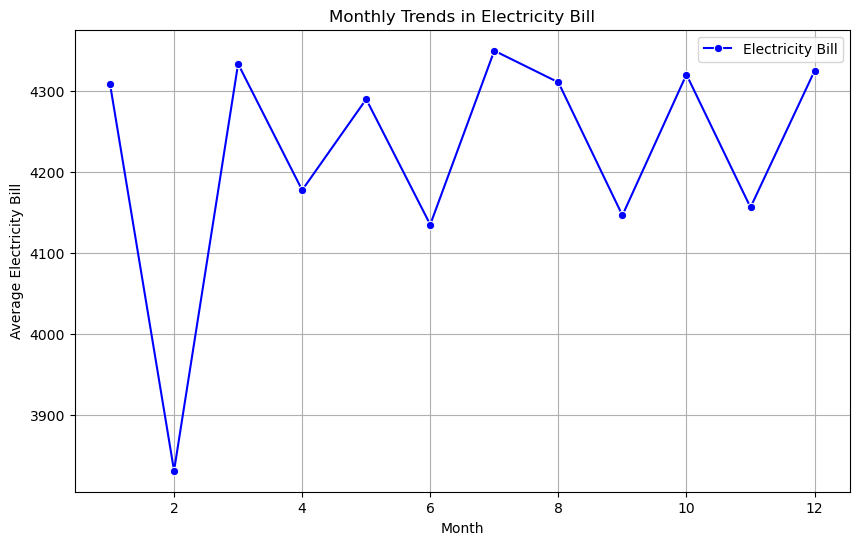

In [75]:
# --------- Objective 2: Monthly Electricity Usage Trends ---------

# Calculate average consumption and electricity bill by month
monthly_trends = df.groupby('Month')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
print("\nMonthly Electricity Usage Trends:")
print(monthly_trends)

# Plot total electricity bill over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='Month', y='ElectricityBill', marker='o', color='blue', label='Electricity Bill')
plt.title('Monthly Trends in Electricity Bill')
plt.xlabel('Month')
plt.ylabel('Average Electricity Bill')
plt.grid()
plt.legend()
plt.show()


City-Wise Electricity Usage and Billing:
           City  ElectricityBill        Fan  Refrigerator  AirConditioner
7        Mumbai      4680.156273  14.418358     21.933579        1.527214
9   Navi Mumbai      4673.726280  14.222372     21.880503        1.486523
12         Pune      4603.194137  14.501163     21.898092        1.494183
8        Nagpur      4510.086442  14.422160     21.972417        1.562412
1       Chennai      4454.878578  14.339102     21.949953        1.507951
6       Kolkata      4416.534247  14.269721     21.964100        1.502126
10    New Delhi      4296.993409  14.330455     21.913182        1.540909
5     Hyderabad      4213.700754  14.051441     21.938803        1.536142
4       Gurgaon      4203.189982  14.425657     21.957842        1.522665
11        Noida      4110.962628  14.328518     21.946878        1.486952
3     Faridabad      4082.198507  14.346902     21.924469        1.529625
0     Ahmedabad      3957.286049  14.292603     21.902154        1.468

/tmp/ipykernel_56674/1657182755.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




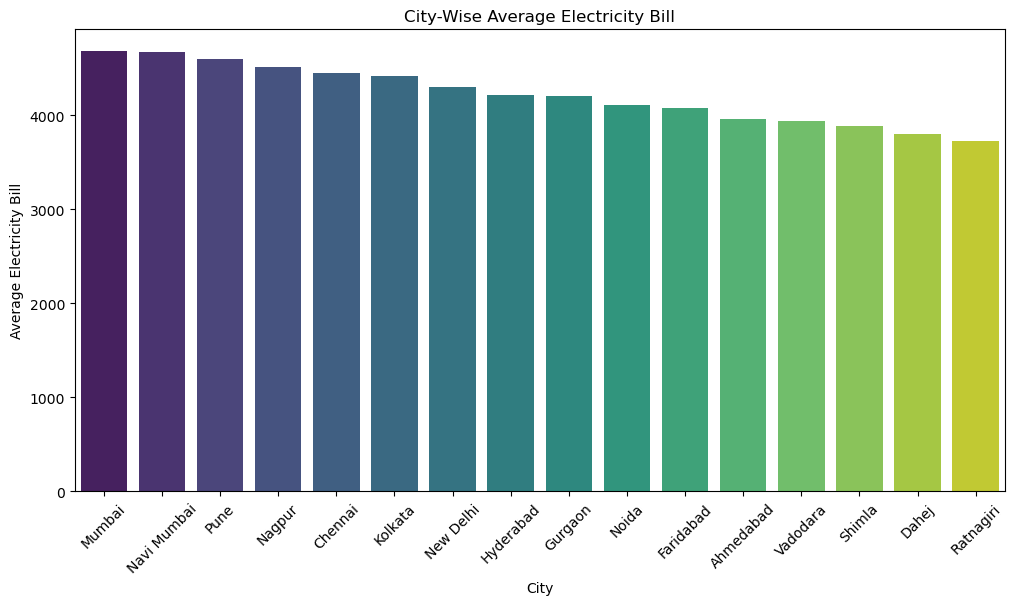

In [76]:
# --------- Objective 3: City-Wise Electricity Usage ---------

# Calculate average electricity consumption and bill by city
city_analysis = df.groupby('City')[['ElectricityBill', 'Fan', 'Refrigerator', 'AirConditioner']].mean().reset_index()
city_analysis = city_analysis.sort_values('ElectricityBill', ascending=False)
print("\nCity-Wise Electricity Usage and Billing:")
print(city_analysis)

# Plot city-wise electricity bills
plt.figure(figsize=(12, 6))
sns.barplot(data=city_analysis, x='City', y='ElectricityBill', palette='viridis')
plt.title('City-Wise Average Electricity Bill')
plt.xlabel('City')
plt.ylabel('Average Electricity Bill')
plt.xticks(rotation=45)
plt.show()


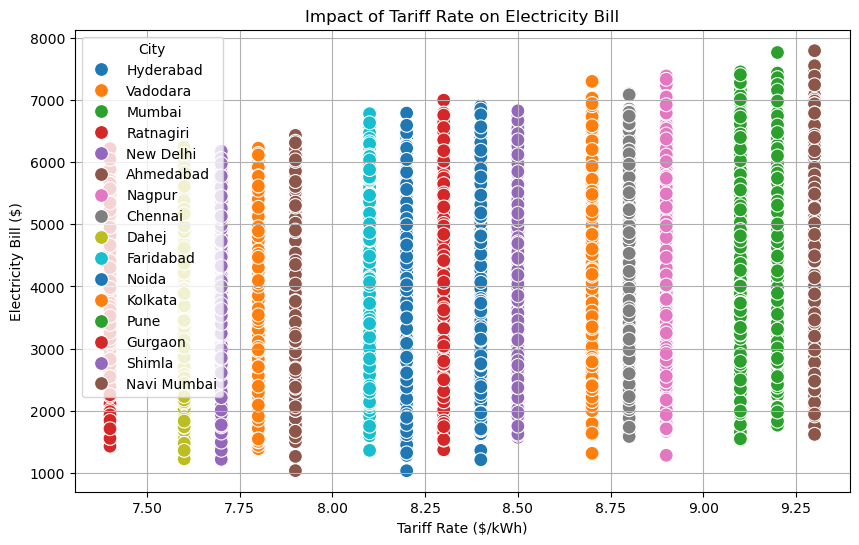


Correlation between Tariff Rate and Electricity Bill: 0.30


In [77]:
# --------- Objective 4: Impact of Tariff Rates ---------

# Analyze the relationship between TariffRate and ElectricityBill
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TariffRate', y='ElectricityBill', hue='City', palette='tab10', s=100)
plt.title('Impact of Tariff Rate on Electricity Bill')
plt.xlabel('Tariff Rate ($/kWh)')
plt.ylabel('Electricity Bill ($)')
plt.grid()
plt.show()

# Correlation between TariffRate and ElectricityBill
correlation = df[['TariffRate', 'ElectricityBill']].corr().iloc[0, 1]
print(f"\nCorrelation between Tariff Rate and Electricity Bill: {correlation:.2f}")


cities like ratnagiri, shimla, dahej and vadodara have lower tariff rate hence low electricity bill. 
It advisable for companies that have high power consumption to consider the ratnagiri, shimla, dahej and vadodara as their manufacturing site due to the lower tariff rate.
It also recommended for with low wages to consider those cities.
For cities like Navi Mumbai, Mumbai and Pune should consider other sources of electricity like solar, geothermal and wind turbines inorder to substitute so as to lower their electricity bills despite the higher tariff rates.

In [78]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill', 'season', 'MonthlyCostPerHour', 'TariffEfficiency',
       'TotalApplianceHours', 'Fan_Contribution', 'Refrigerator_Contribution',
       'AirConditioner_Contribution', 'Television_Contribution',
       'Monitor_Contribution', 'MotorPump_Contribution', 'UsageCategory'],
      dtype='object')


Proportion of Total Electricity Consumption by Appliance:
        Appliance  Total Consumption (kWh)  Proportion (%)
1    Refrigerator                 759900.0       42.768042
0             Fan                 495732.0       27.900364
3      Television                 434045.0       24.428549
2  AirConditioner                  52463.0        2.952678
4         Monitor                  34654.0        1.950367
5       MotorPump                      0.0        0.000000


/tmp/ipykernel_56674/3553329814.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




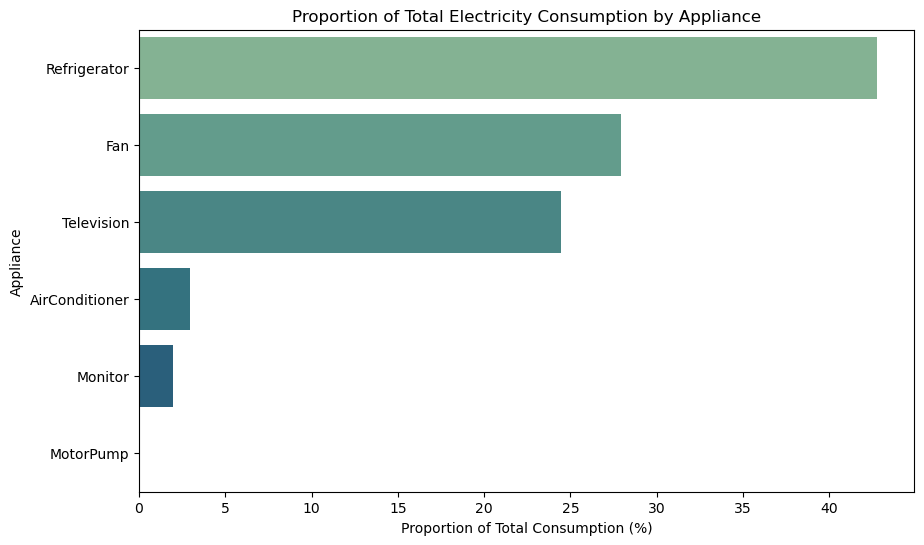

In [79]:
# --------- Objective 5: Total Energy Efficiency ---------

# Calculate the proportion of total electricity consumption by each appliance
df['TotalConsumption'] = df[appliances].sum(axis=1)
appliance_efficiency = df[appliances].sum().reset_index()
appliance_efficiency.columns = ['Appliance', 'Total Consumption (kWh)']
appliance_efficiency['Proportion (%)'] = (appliance_efficiency['Total Consumption (kWh)'] / appliance_efficiency['Total Consumption (kWh)'].sum()) * 100

# Sort by proportion of consumption
appliance_efficiency = appliance_efficiency.sort_values('Proportion (%)', ascending=False)
print("\nProportion of Total Electricity Consumption by Appliance:")
print(appliance_efficiency)

# Plot energy efficiency by appliance
plt.figure(figsize=(10, 6))
sns.barplot(data=appliance_efficiency, x='Proportion (%)', y='Appliance', palette='crest')
plt.title('Proportion of Total Electricity Consumption by Appliance')
plt.xlabel('Proportion of Total Consumption (%)')
plt.ylabel('Appliance')
plt.show()

The refrigerator has highest electricity consumption rate followed by the fan and television.
Companies that want to venture into electric equipments like refrigerator, fan and television should make energy saving equipments that give them a competitive edge over current market.

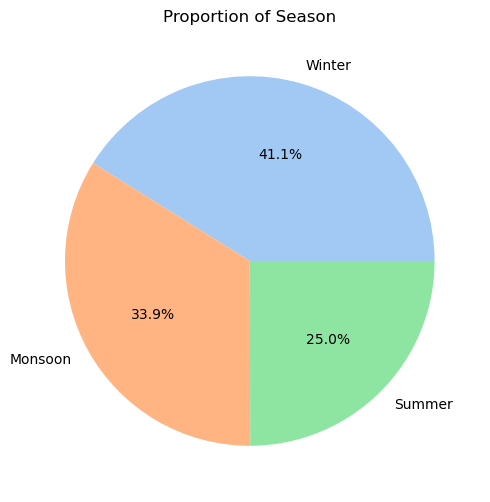

In [80]:
# seasonal pie chart distribution
    # Pie chart
plt.figure(figsize=(6, 6))
df['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Season')
plt.ylabel('')
plt.show()

It is noted that during winter there is higher elecricity consumption compared to other seasons.


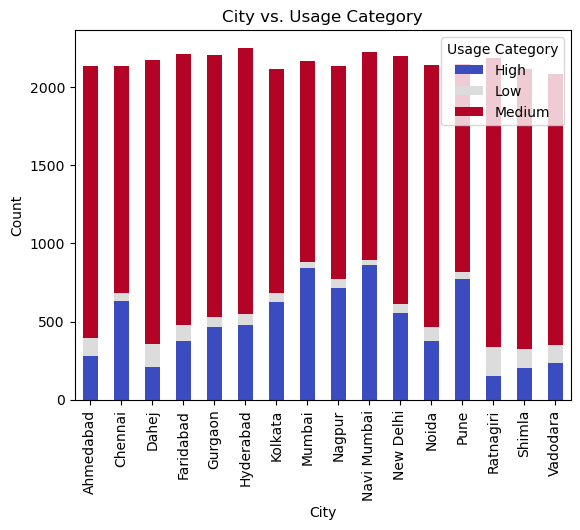

In [81]:
# Stacked bar chart example
pd.crosstab(df['City'], df['UsageCategory']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('City vs. Usage Category')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Usage Category')
plt.show()



Seasonal Analysis Results:
    season  ElectricityBill  TariffEfficiency  MonthlyCostPerHour  \
0  Monsoon      4234.392651        505.460020            8.374388   
1   Summer      4267.431538        509.838844            8.369908   
2   Winter      4186.707391        500.275477            8.367883   

   Fan_Contribution  Refrigerator_Contribution  AirConditioner_Contribution  \
0         27.312130                  43.885647                     3.006244   
1         27.429598                  43.742722                     2.986312   
2         27.375267                  43.776122                     2.990558   

   Television_Contribution  Monitor_Contribution  MotorPump_Contribution  
0                23.783189              2.012790                     0.0  
1                23.834849              2.006519                     0.0  
2                23.848986              2.009067                     0.0  


/tmp/ipykernel_56674/68868623.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




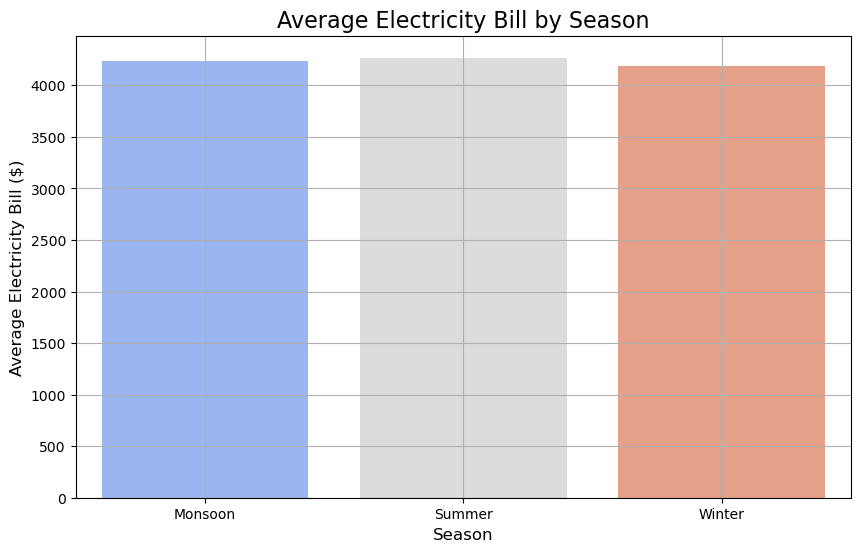

In [82]:
# --------- Step 1: Seasonal Analysis ---------

# Group by season and calculate average electricity bill, tariff efficiency, and appliance contributions
seasonal_analysis = df.groupby('season')[
    ['ElectricityBill', 'TariffEfficiency', 'MonthlyCostPerHour'] + 
    ['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
     'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution']
].mean().reset_index()

print("\nSeasonal Analysis Results:")
print(seasonal_analysis)

# Plot seasonal electricity bills
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_analysis, x='season', y='ElectricityBill', palette='coolwarm')
plt.title('Average Electricity Bill by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Electricity Bill ($)', fontsize=12)
plt.grid(True)
plt.show()



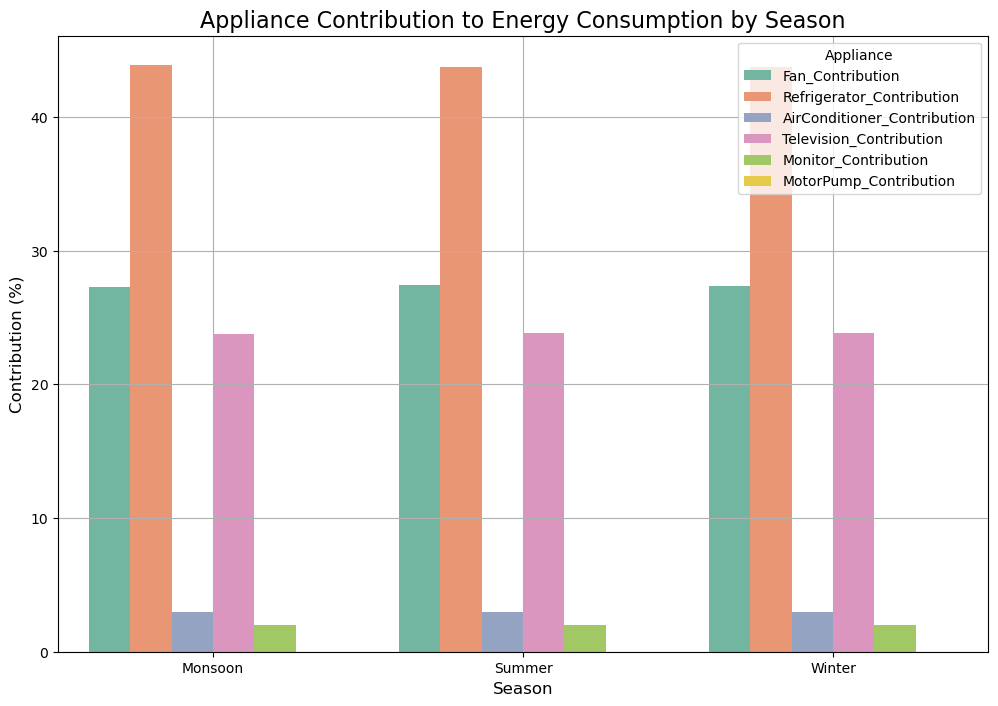

In [83]:
# Plot seasonal appliance contributions
appliance_contributions = seasonal_analysis.melt(
    id_vars='season', 
    value_vars=['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
                'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution'],
    var_name='Appliance',
    value_name='Contribution (%)'
)

plt.figure(figsize=(12, 8))
sns.barplot(data=appliance_contributions, x='season', y='Contribution (%)', hue='Appliance', palette='Set2')
plt.title('Appliance Contribution to Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend(title='Appliance', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()



Cost Efficiency by City and Season:
           City   season  MonthlyCostPerHour  TariffEfficiency
0     Ahmedabad  Monsoon                 7.9        501.458333
1     Ahmedabad   Summer                 7.9        508.566108
2     Ahmedabad   Winter                 7.9        495.813424
3       Chennai  Monsoon                 8.8        509.900133
4       Chennai   Summer                 8.8        510.621569
5       Chennai   Winter                 8.8        500.548461
6         Dahej  Monsoon                 7.6        500.298898
7         Dahej   Summer                 7.6        499.625461
8         Dahej   Winter                 7.6        500.965859
9     Faridabad  Monsoon                 8.1        506.414248
10    Faridabad   Summer                 8.1        507.089286
11    Faridabad   Winter                 8.1        500.373024
12      Gurgaon  Monsoon                 8.3        505.416557
13      Gurgaon   Summer                 8.3        519.785199
14      Gurgaon   

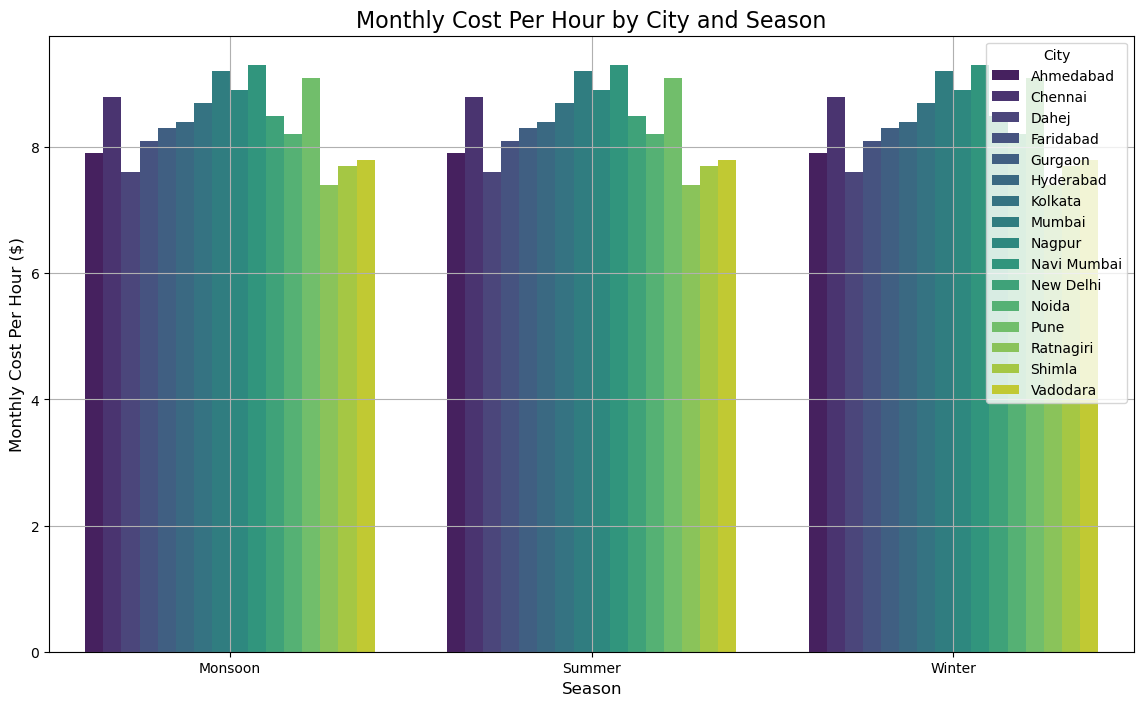

In [84]:
# --------- Step 2: Cost Efficiency by Season and City ---------

# Group by city and season to calculate cost efficiency
city_season_analysis = df.groupby(['City', 'season'])[['MonthlyCostPerHour', 'TariffEfficiency']].mean().reset_index()
print("\nCost Efficiency by City and Season:")
print(city_season_analysis)

# Plot cost efficiency by season for top cities
plt.figure(figsize=(14, 8))
sns.barplot(data=city_season_analysis, x='season', y='MonthlyCostPerHour', hue='City', palette='viridis')
plt.title('Monthly Cost Per Hour by City and Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Monthly Cost Per Hour ($)', fontsize=12)
plt.legend(title='City', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


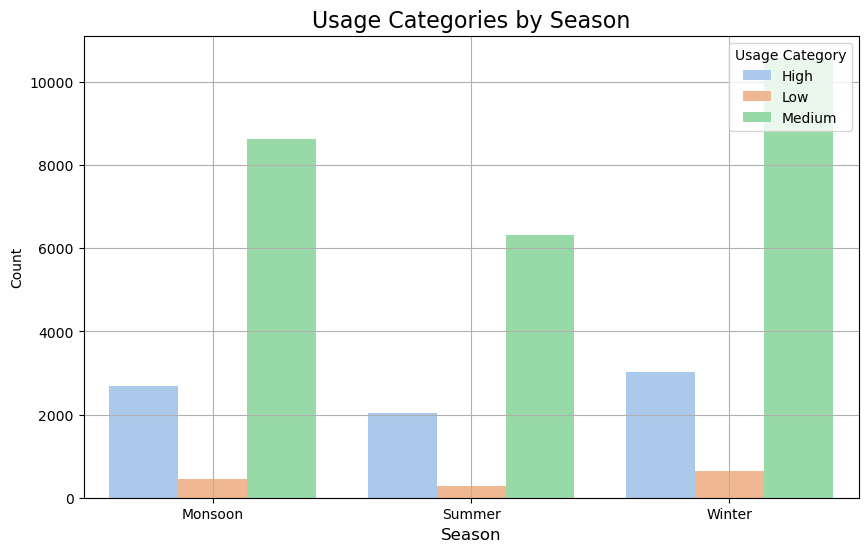

In [85]:
# --------- Step 3: UsageCategory Trends ---------

# Count the number of occurrences of each usage category by season
usage_category_analysis = df.groupby(['season', 'UsageCategory']).size().reset_index(name='Count')

# Plot usage categories by season
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_category_analysis, x='season', y='Count', hue='UsageCategory', palette='pastel')
plt.title('Usage Categories by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count')
plt.legend(title='Usage Category', fontsize=10, loc='upper right')
plt.grid(True)
plt.show()


Seasonal Appliance Usage and Total Consumption:
    season  TotalApplianceHours  TotalConsumption
0  Monsoon            51.196580         51.196580
1   Summer            51.354682         51.354682
2   Winter            51.285022         51.285022


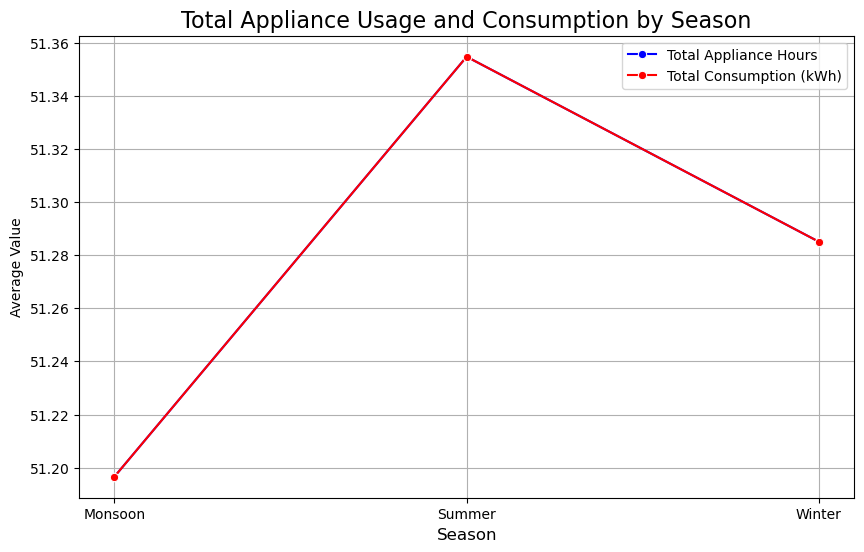

In [86]:
# --------- Step 4: Appliance Usage Patterns ---------

# Calculate average TotalApplianceHours and TotalConsumption by season
season_usage_analysis = df.groupby('season')[['TotalApplianceHours', 'TotalConsumption']].mean().reset_index()
print("\nSeasonal Appliance Usage and Total Consumption:")
print(season_usage_analysis)

# Plot TotalApplianceHours and TotalConsumption by season
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_usage_analysis, x='season', y='TotalApplianceHours', marker='o', label='Total Appliance Hours', color='blue')
sns.lineplot(data=season_usage_analysis, x='season', y='TotalConsumption', marker='o', label='Total Consumption (kWh)', color='red')
plt.title('Total Appliance Usage and Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Value')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [87]:
df = df.drop(columns=['Fan_Contribution', 'Refrigerator_Contribution', 'AirConditioner_Contribution', 
                     'Television_Contribution', 'Monitor_Contribution', 'MotorPump_Contribution', 
                      'MonthlyCostPerHour', 'MotorPump', 'TotalConsumption', 'Monitor', 'TariffEfficiency'])


In [88]:
df_new = df.copy()

df_new.to_csv(r'/home/western/Documents/Data/cleaned_electricity_data.csv', index=False)

In [89]:
df_new.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Month', 'City',
       'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill', 'season',
       'TotalApplianceHours', 'UsageCategory'],
      dtype='object')

In [90]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34654 entries, 0 to 45342
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fan                  34654 non-null  int64  
 1   Refrigerator         34654 non-null  float64
 2   AirConditioner       34654 non-null  float64
 3   Television           34654 non-null  float64
 4   Month                34654 non-null  int64  
 5   City                 34654 non-null  object 
 6   Company              34654 non-null  object 
 7   MonthlyHours         34654 non-null  int64  
 8   TariffRate           34654 non-null  float64
 9   ElectricityBill      34654 non-null  float64
 10  season               34654 non-null  object 
 11  TotalApplianceHours  34654 non-null  float64
 12  UsageCategory        34654 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 3.7+ MB


In [91]:
df_new.describe()

Fan  Refrigerator  AirConditioner    Television         Month  \
count  34654.000000  34654.000000    34654.000000  34654.000000  34654.000000   
mean      14.305188     21.928205        1.513909     12.525105      6.493911   
std        5.394415      1.352267        1.113696      5.737281      3.445593   
min        5.000000     18.000000        0.000000      3.000000      1.000000   
25%       10.000000     22.000000        1.000000      8.000000      3.000000   
50%       14.000000     22.000000        2.000000     13.000000      7.000000   
75%       19.000000     23.000000        3.000000     17.000000      9.000000   
max       23.000000     23.000000        3.000000     22.000000     12.000000   

       MonthlyHours    TariffRate  ElectricityBill  TotalApplianceHours  
count  34654.000000  34654.000000     34654.000000         34654.000000  
mean     504.421394      8.370595      4223.033696            51.272407  
std      113.700723      0.576356      1000.232699             8.529085  
min      126.000000      7.400000      1033.200000            27.000000  
25%      424.000000      7.900000      3511.200000            45.000000  
50%      505.000000      8.400000      4214.800000            51.000000  
75%      586.000000      8.900000      4913.600000            58.000000  
max      844.000000      9.300000      7793.400000            72.000000

In [34]:
cat_cols = df_new.select_dtypes(include=['object','category']).columns
num_cols = df_new.select_dtypes(include=['number']).columns
print(cat_cols)
print("\n")
print(num_cols)

Index(['City', 'Company', 'season', 'UsageCategory'], dtype='object')


Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Month',
       'MonthlyHours', 'TariffRate', 'ElectricityBill', 'TotalApplianceHours'],
      dtype='object')


In [93]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}' column: {unique_values}")

Unique values in 'City' column: ['Hyderabad' 'Vadodara' 'Mumbai' 'Ratnagiri' 'New Delhi' 'Ahmedabad'
 'Nagpur' 'Chennai' 'Dahej' 'Faridabad' 'Noida' 'Kolkata' 'Pune' 'Gurgaon'
 'Shimla' 'Navi Mumbai']
Unique values in 'Company' column: ['Tata Power Company Ltd.' 'NHPC' 'Power Grid Corp'
 'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)' 'Adani Power Ltd.'
 'Orient Green' 'Neueon Towers / Sujana Towers Ltd.'
 'Sterlite Power Transmission Ltd' 'KEC International' 'Indowind Energy'
 'Bonfiglioli Transmission Pvt. Ltd.' 'SJVN Ltd.' 'Guj Ind Power'
 'Jyoti Structure' 'Torrent Power Ltd.' 'Reliance Energy'
 'GE T&D India Limited' 'NTPC Pvt. Ltd.'
 'Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.'
 'L&T Transmission & Distribution'
 'Optibelt Power Transmission India Private Limited' 'CESC'
 'Reliance Power' 'Sunil Hitech Eng' 'JSW Energy Ltd.'
 'Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.'
 'Kalpataru Power' 'Jaiprakash Power' 'Unitech Power Transmission Ltd.'


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Unique values in '{col}' column: {unique_values}")

In [35]:
df_new['season'].unique()

array(['Winter', 'Summer', 'Monsoon'], dtype=object)

Gradient Boosting Model

one hot encoder

In [36]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['City', 'Company', 'season', 'UsageCategory'], dtype='object')

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['City', 'Company', 'season', 'UsageCategory']

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df= encoded_df.copy()

df.head()

Fan  Refrigerator  AirConditioner  Television  Month  MonthlyHours  \
0  16.0          23.0             2.0         6.0   10.0         384.0   
1  19.0          22.0             2.0         3.0    5.0         488.0   
3   7.0          22.0             3.0        21.0    6.0         475.0   
4  11.0          23.0             2.0        11.0    2.0         457.0   
5  13.0          22.0             0.0        18.0    6.0         471.0   

   TariffRate  ElectricityBill  TotalApplianceHours  City_Chennai  ...  \
0         8.4           3225.6                 48.0           0.0  ...   
1         7.8           3806.4                 47.0           0.0  ...   
3         9.2           4370.0                 54.0           0.0  ...   
4         9.2           4204.4                 48.0           0.0  ...   
5         7.4           3485.4                 54.0           0.0  ...   

   Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.  \
0                                                0.0                       
1                                                0.0                       
3                                                0.0                       
4                                                0.0                       
5                                                0.0                       

   Company_TransRail Lighting  Company_Unitech Power Transmission Ltd.  \
0                         0.0                                      0.0   
1                         0.0                                      0.0   
3                         0.0                                      0.0   
4                         0.0                                      0.0   
5                         0.0                                      0.0   

   Company_nan  season_Summer  season_Winter  season_nan  UsageCategory_Low  \
0          0.0            0.0            1.0         0.0                0.0   
1          0.0            1.0            0.0         0.0                0.0   
3          0.0            0.0            1.0         0.0                0.0   
4          0.0            0.0            0.0         0.0                0.0   
5          0.0            0.0            1.0         0.0                0.0   

   UsageCategory_Medium  UsageCategory_nan  
0                   1.0                0.0  
1                   1.0                0.0  
3                   1.0                0.0  
4                   1.0                0.0  
5                   1.0                0.0  

[5 rows x 62 columns]

In [38]:
df.describe()

Fan  Refrigerator  AirConditioner    Television         Month  \
count  34654.000000  34654.000000    34654.000000  34654.000000  34654.000000   
mean      14.305188     21.928205        1.513909     12.525105      6.493911   
std        5.394415      1.352267        1.113696      5.737281      3.445593   
min        5.000000     18.000000        0.000000      3.000000      1.000000   
25%       10.000000     22.000000        1.000000      8.000000      3.000000   
50%       14.000000     22.000000        2.000000     13.000000      7.000000   
75%       19.000000     23.000000        3.000000     17.000000      9.000000   
max       23.000000     23.000000        3.000000     22.000000     12.000000   

       MonthlyHours    TariffRate  ElectricityBill  TotalApplianceHours  \
count  34654.000000  34654.000000     34654.000000         34654.000000   
mean     504.421394      8.370595      4223.033696            51.272407   
std      113.700723      0.576356      1000.232699             8.529085   
min      126.000000      7.400000      1033.200000            27.000000   
25%      424.000000      7.900000      3511.200000            45.000000   
50%      505.000000      8.400000      4214.800000            51.000000   
75%      586.000000      8.900000      4913.600000            58.000000   
max      844.000000      9.300000      7793.400000            72.000000   

       City_Chennai  ...  \
count  34654.000000  ...   
mean       0.061696  ...   
std        0.240605  ...   
min        0.000000  ...   
25%        0.000000  ...   
50%        0.000000  ...   
75%        0.000000  ...   
max        1.000000  ...   

       Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.  \
count                                       42844.000000                       
mean                                            0.023994                       
std                                             0.153032                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             0.000000                       
max                                             1.000000                       

       Company_TransRail Lighting  Company_Unitech Power Transmission Ltd.  \
count                42844.000000                             42844.000000   
mean                     0.024601                                 0.025114   
std                      0.154907                                 0.156474   
min                      0.000000                                 0.000000   
25%                      0.000000                                 0.000000   
50%                      0.000000                                 0.000000   
75%                      0.000000                                 0.000000   
max                      1.000000                                 1.000000   

        Company_nan  season_Summer  season_Winter    season_nan  \
count  42844.000000   44750.000000   44750.000000  44750.000000   
mean       0.191159       0.193296       0.318391      0.225609   
std        0.393218       0.394888       0.465857      0.417987   
min        0.000000       0.000000       0.000000      0.000000   
25%        0.000000       0.000000       0.000000      0.000000   
50%        0.000000       0.000000       0.000000      0.000000   
75%        0.000000       0.000000       1.000000      0.000000   
max        1.000000       1.000000       1.000000      1.000000   

       UsageCategory_Low  UsageCategory_Medium  UsageCategory_nan  
count       45190.000000          45190.000000       45190.000000  
mean            0.030073              0.564837           0.233149  
std             0.170790              0.495784           0.422841  
min             0.000000              0.000000           

In [39]:
df_new.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Month', 'City',
       'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill', 'season',
       'TotalApplianceHours', 'UsageCategory'],
      dtype='object')

In [40]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Drop null values
df = df.dropna()

# Features and target variable
X = df.drop(columns=['ElectricityBill'])
y = df['ElectricityBill']

# Train-validation-test split (Train: 64%, Val: 16%, Test: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=127)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.55, random_state=127)  # 16% Val, 20% Test


In [41]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# time 
import time

# Define the models
models = {
    #'Decision Tree': DecisionTreeRegressor(),
    #'Extra Trees': ExtraTreesRegressor(),
    #'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    #'KNN Regression': KNeighborsRegressor(),
    #'LGBM Regressor': LGBMRegressor(verbose=0),
    #'CatBoost Regressor': CatBoostRegressor(verbose=0),
    #'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(8)

Model        MAE         MSE       RMSE      MAPE       R2  \
0  Gradient Boosting  16.618176  442.419932  21.033781  0.422486  0.99956   

   Training Time (s)  Prediction Time (s)  
0           2.950311             0.013067

In [43]:
# Plotting a grouped bar graph
import plotly.express as px
fig = px.bar(results_df, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()

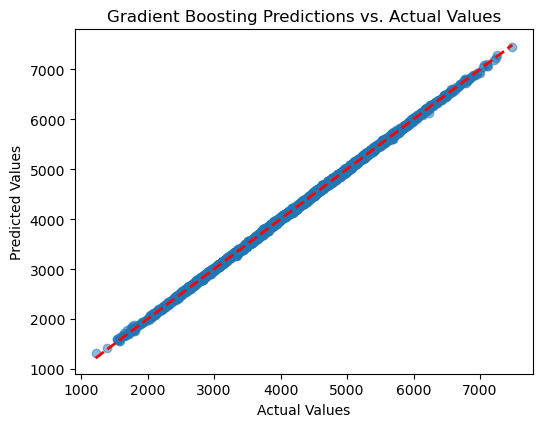

In [44]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

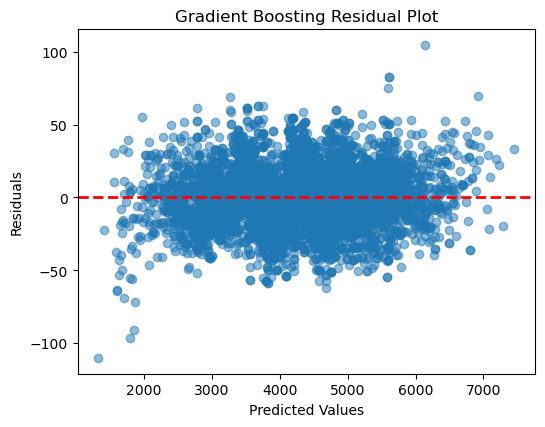

In [45]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

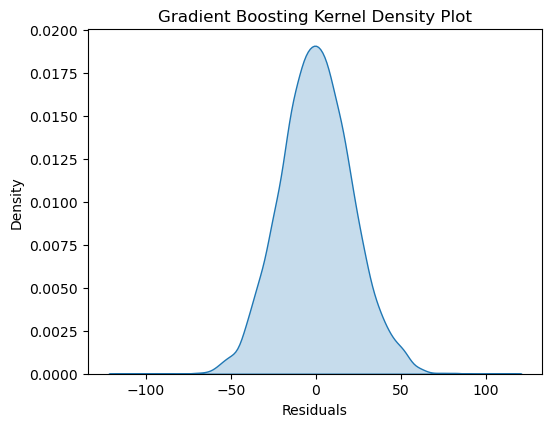

In [46]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

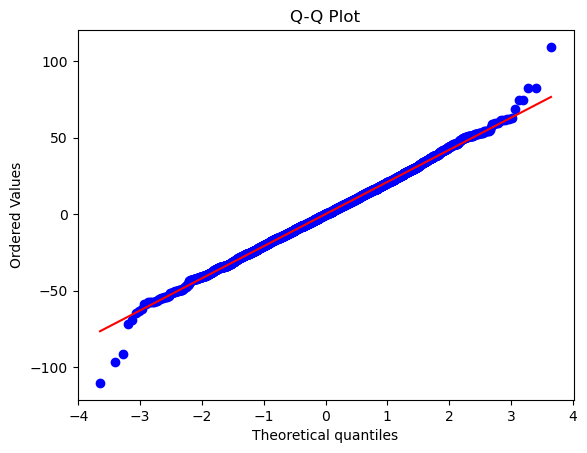

In [47]:
import scipy.stats as stats


stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [48]:
# Initialize the Gradient Boosting Regressor
rf_model = GradientBoostingRegressor()

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Adjusted R2': [], 'COD': [], 'Training Time (s)': [], 'Prediction Time (s)': []
}

# Measure the training time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Measure the prediction time
start_time = time.time()
y_pred = rf_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Calculate Coefficient of Determination (COD) (it's equivalent to R2 in sklearn)
cod = r2  # COD is the same as R2 in sklearn metrics.

# Calculate Adjusted R2
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Store results in a dictionary
results['Model'].append('Gradient Boosting Model')
results['MAE'].append(mae)
results['MSE'].append(mse)
results['RMSE'].append(rmse)
results['R2'].append(r2)
results['Adjusted R2'].append(adjusted_r2)
results['COD'].append(cod)
results['MAPE'].append(mape)
results['Training Time (s)'].append(training_time)
results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

Model        MAE         MSE       RMSE      MAPE  \
0  Gradient Boosting Model  16.616331  442.089611  21.025927  0.422458   

        R2  Adjusted R2      COD  Training Time (s)  Prediction Time (s)  
0  0.99956     0.999555  0.99956           2.980393             0.012611

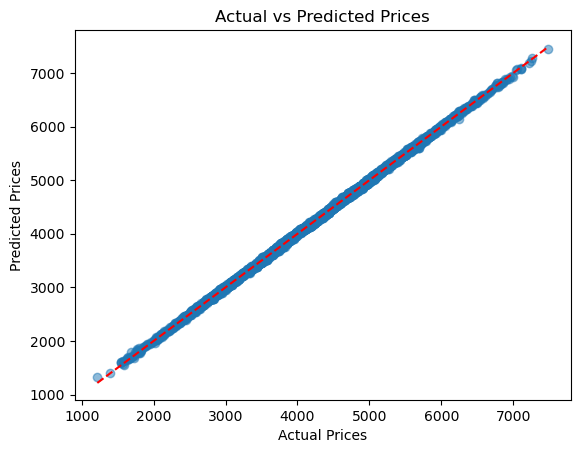

In [49]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

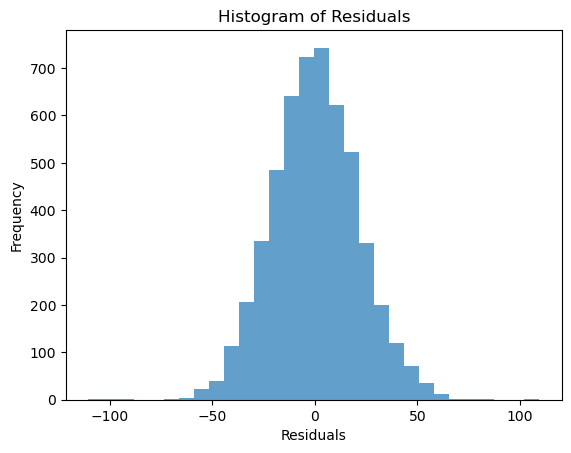

In [50]:
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

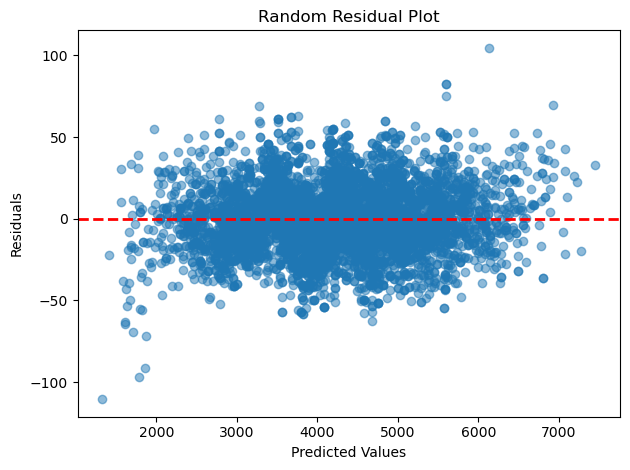

In [51]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Random Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

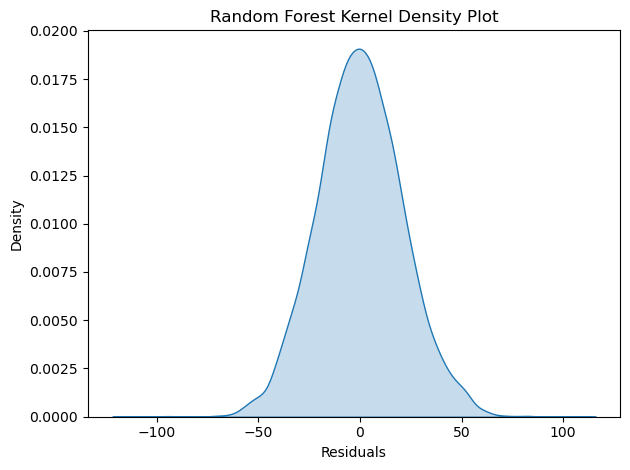

In [52]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

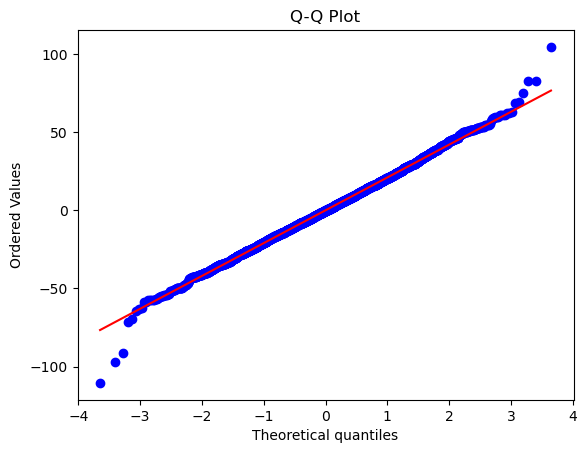

In [53]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

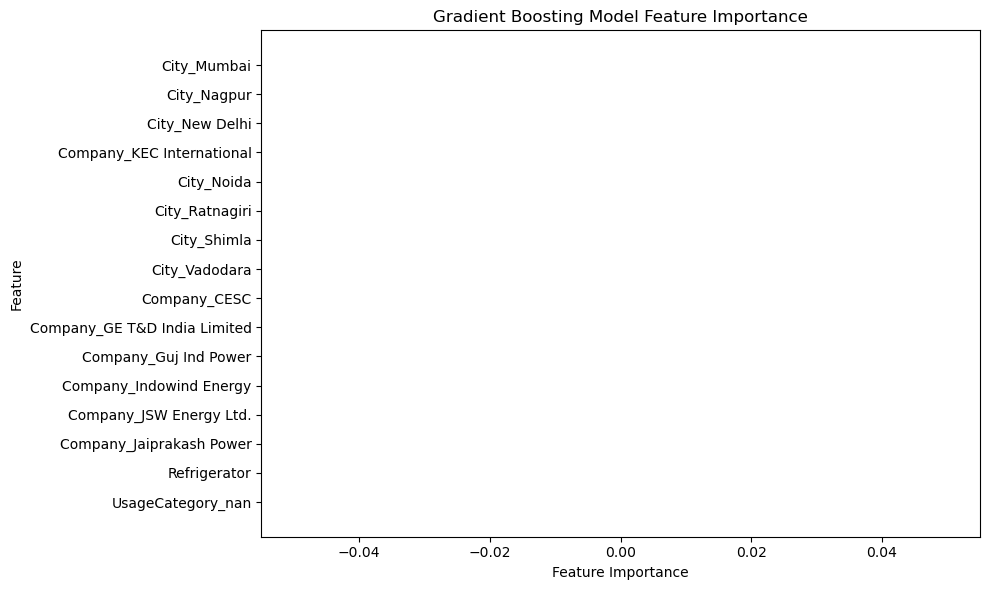

In [54]:
# Get Feature Importance
feature_importance =  model.feature_importances_

# Create a DataFrame to view feature importance 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[45:75]

# Plot Horizontal Bar Graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Model Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have most important at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [56]:
!pip install optuna

  Using cached alembic-1.14.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.9-py3-none-any.whl.metadata (2.9 kB)
Using cached alembic-1.14.1-py3-none-any.whl (233 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached Mako-1.3.9-py3-none-any.whl (78 kB)


In [58]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression




# Define Objective Function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'max_features': trial.suggest_float('max_features', 0.6, 1.0),  # Replaces colsample_bytree
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 1.0),  # Replaces gamma
        'random_state': 42  # Fixed for reproducibility
    }
    
    # Initialize the GradientBoostingRegressor model
    gbm = GradientBoostingRegressor(**params)

    # Train the model
    gbm.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = gbm.predict(X_test_scaled)

    # Compute MAE (Lower is better)
    mae_test = mean_absolute_error(y_test, y_pred)

    return mae_test

# Run Optuna Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print Best Parameters
print("Best Hyperparameters:", study.best_params)


[I 2025-02-15 13:24:20,219] A new study created in memory with name: no-name-05fac686-2dee-4c77-bb00-32e769d81f8b
[I 2025-02-15 13:24:24,550] Trial 0 finished with value: 10.68325457991364 and parameters: {'n_estimators': 98, 'max_depth': 9, 'learning_rate': 0.06978931012584434, 'subsample': 0.6241940499738167, 'max_features': 0.657883099707605, 'min_impurity_decrease': 0.5723166900796035}. Best is trial 0 with value: 10.68325457991364.
[I 2025-02-15 13:24:25,168] Trial 1 finished with value: 355.27554518897807 and parameters: {'n_estimators': 13, 'max_depth': 8, 'learning_rate': 0.062026369958680834, 'subsample': 0.718566209702926, 'max_features': 0.8085745188626289, 'min_impurity_decrease': 0.8811641057584744}. Best is trial 0 with value: 10.68325457991364.
[I 2025-02-15 13:24:25,687] Trial 2 finished with value: 605.1869138739555 and parameters: {'n_estimators': 19, 'max_depth': 5, 'learning_rate': 0.016615939819297827, 'subsample': 0.9073168518706752, 'max_features': 0.610717820633

Best Hyperparameters: {'n_estimators': 95, 'max_depth': 10, 'learning_rate': 0.05589943411660341, 'subsample': 0.9272067745852979, 'max_features': 0.8435166442687115, 'min_impurity_decrease': 0.28006374711929194}


In [89]:
# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


MAE: 16.616331473173528
R2: 0.9995599909093449
MAPE: 0.42245761096134815
MSE: 442.0896107467967
RMSE: 21.02592710790173


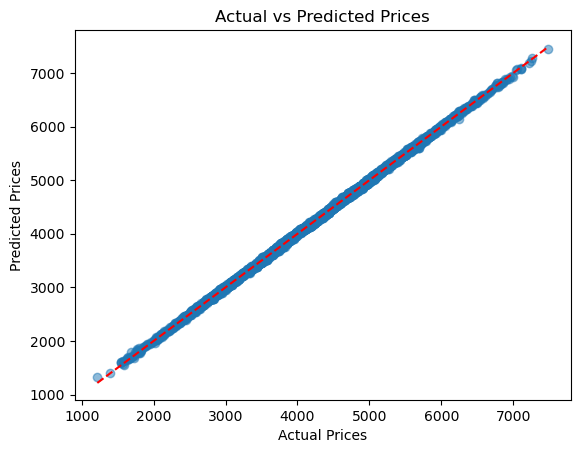

In [90]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

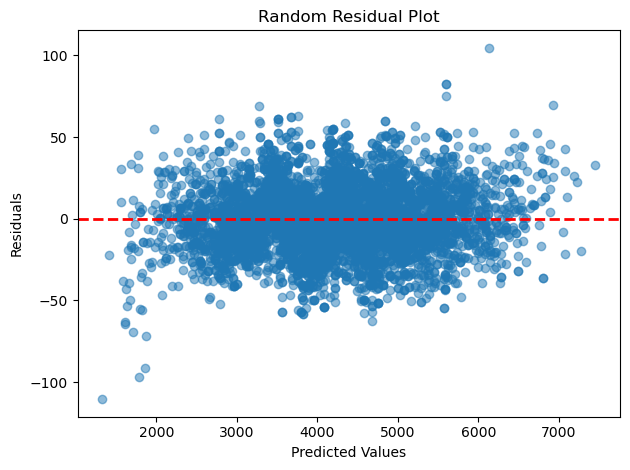

In [91]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Random Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

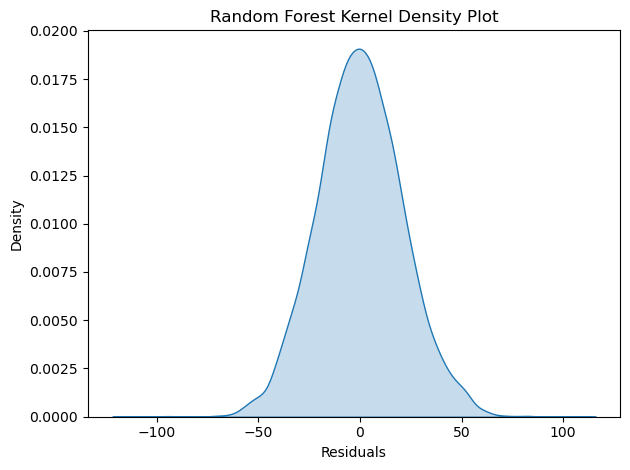

In [92]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

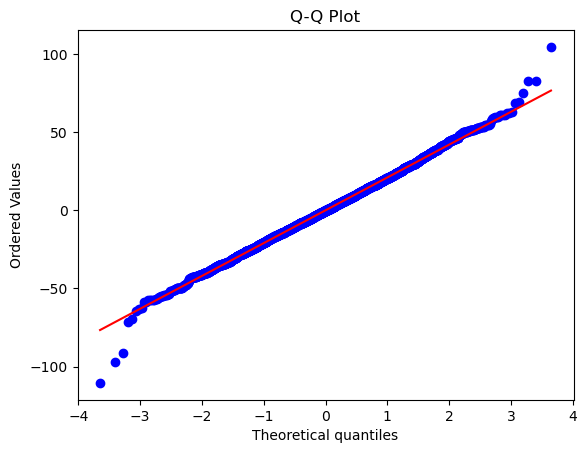

In [93]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [94]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Assume df is already loaded
# Drop null values
df = df.dropna()

# Features and target variable
X = df.drop(columns=['ElectricityBill'])
y = df['ElectricityBill']

# Train-validation-test split (Train: 64%, Val: 16%, Test: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=127)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.55, random_state=127)  # 16% Val, 20% Test

# Feature Scaling (Not strictly required for trees, but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Gradient Boosting Model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=127
)

# Train the model
start_time = time.time()
gb_model.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Make predictions
y_train_pred = gb_model.predict(X_train_scaled)
y_val_pred = gb_model.predict(X_val_scaled)
y_test_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training Time: {train_time:.2f} seconds")
print(f"Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}, Val MSE: {val_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")

Training Time: 2.63 seconds
Train MAE: 17.1601, Val MAE: 17.9277, Test MAE: 17.5321
Train MSE: 466.3570, Val MSE: 529.5954, Test MSE: 494.5321
Train R²: 0.9995, Val R²: 0.9995, Test R²: 0.9995


In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=127)

# Store results
cv_results = {'Fold': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Perform cross-validation
fold = 1
for train_idx, val_idx in kf.split(X, y):
    # Split data
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Scale data (optional for Gradient Boosting but improves performance)
    scaler = StandardScaler()
    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_val_cv_scaled = scaler.transform(X_val_cv)

    # Train the model
    gb_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=127
    )
    gb_model.fit(X_train_cv_scaled, y_train_cv)

    # Predict on validation fold
    y_pred_cv = gb_model.predict(X_val_cv_scaled)

    # Compute evaluation metrics
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv)
    mse_cv = mean_squared_error(y_val_cv, y_pred_cv)
    rmse_cv = np.sqrt(mse_cv)
    mape_cv = np.mean(np.abs((y_val_cv - y_pred_cv) / y_val_cv)) * 100
    r2_cv = r2_score(y_val_cv, y_pred_cv)

    # Store fold results
    cv_results['Fold'].append(f'Fold {fold}')
    cv_results['MAE'].append(mae_cv)
    cv_results['MSE'].append(mse_cv)
    cv_results['RMSE'].append(rmse_cv)
    cv_results['MAPE'].append(mape_cv)
    cv_results['R2'].append(r2_cv)

    fold += 1

# Create DataFrame with results
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)


     Fold        MAE         MSE       RMSE      MAPE        R2
0  Fold 1  16.866907  465.002510  21.563917  0.424131  0.999532
1  Fold 2  17.193464  484.960652  22.021822  0.430237  0.999514
2  Fold 3  17.316365  488.891031  22.110880  0.437767  0.999505
3  Fold 4  17.409124  504.471065  22.460433  0.435867  0.999514
4  Fold 5  16.462489  441.153830  21.003662  0.409774  0.999550


In [96]:
# Predict on test set
y_pred_test = gb_model.predict(X_test_scaled)

# Evaluate model on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
r2_test = r2_score(y_test, y_pred_test)

# Print test set results
print(f"Test Set Results for Gradient Boosting Regressor:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.2f}%, R2: {r2_test:.4f}")


Test Set Results for Gradient Boosting Regressor:
MAE: 16.8785, MSE: 459.8149, RMSE: 21.4433, MAPE: 0.43%, R2: 0.9995


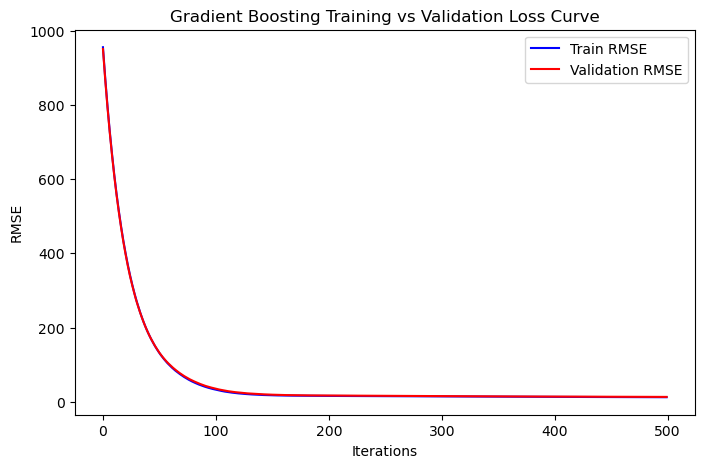

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the model
gb_model = GradientBoostingRegressor(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=3, 
    subsample=0.8, 
    random_state=127
)

# First, fit the model
gb_model.fit(X_train_scaled, y_train)

# Now, track RMSE at each iteration
train_rmse = []
val_rmse = []

for y_pred_train, y_pred_val in zip(gb_model.staged_predict(X_train_scaled), gb_model.staged_predict(X_val_scaled)):
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Gradient Boosting Training vs Validation Loss Curve')
plt.legend()
plt.show()


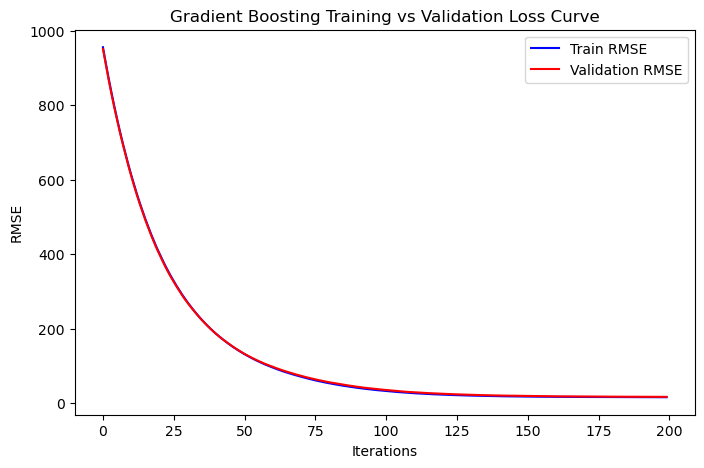

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=3, 
    subsample=0.8, 
    random_state=127
)

# Fit the model
gb_model.fit(X_train_scaled, y_train)

# Track RMSE for each boosting iteration
train_rmse = []
val_rmse = []

for y_pred_train, y_pred_val in zip(gb_model.staged_predict(X_train_scaled), gb_model.staged_predict(X_val_scaled)):
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Plot Training vs Validation Loss (RMSE)
plt.figure(figsize=(8, 5))
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Gradient Boosting Training vs Validation Loss Curve')
plt.legend()
plt.show()
